In [52]:
from data_preprocessing import *
from feature_engineering import *
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
train_df = pd.read_csv('train.csv')
validation_df = pd.read_csv('validation.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df

,rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma
0,4.7203,521.8451,MKPFX,9231.75,2019-11-10 10:42:00,OMUOI,LFUHN
1,4.9005,532.6675,MKPFX,11754.95,2019-11-10 10:42:00,OMUOI,LFUHN
2,4.7018,523.9188,MKPFX,9603.20,2019-11-10 10:42:00,OMUOI,LFUHN
3,4.6388,562.8296,MKPFX,8789.05,2019-11-10 10:42:00,OMUOI,LFUHN
4,5.0206,519.8782,MKPFX,9597.50,2019-11-10 10:42:00,OMUOI,LFUHN
...,...,...,...,...,...,...,...
296722,4.0141,283.5654,MKPFX,41394.00,2022-09-05 20:02:00,NUTZC,AWWEE
296723,5.4880,162.1160,MKPFX,15220.55,2022-09-05 20:02:00,FPZNC,NTODX
296724,5.3078,645.8933,KFEGT,41280.00,2022-09-05 20:12:00,RCDSS,EJLNQ
296725,5.2722,432.8540,MKPFX,11450.00,2022-09-05 20:42:00,OKPES,NTODX


In [ ]:
# Create a lag feature for yesterday's rate (lag=1), also for 7 and 30 days ago
train_df = create_lag_features(train_df, target_column='rate', lag=1)
train_df = create_lag_features(train_df, target_column='rate', lag=7)  # Lag 7 days
train_df = create_lag_features(train_df, target_column='rate', lag=30)  # Lag 30 days

# Check the correlation between rate and lagged rates
correlation_lag1 = train_df['rate'].corr(train_df['rate_lag1'])
correlation_lag7 = train_df['rate'].corr(train_df['rate_lag7'])
correlation_lag30 = train_df['rate'].corr(train_df['rate_lag30'])

print(f"Correlation between rate and rate_lag1: {correlation_lag1:.4f}")
print(f"Correlation between rate and rate_lag7: {correlation_lag7:.4f}")
print(f"Correlation between rate and rate_lag30: {correlation_lag30:.4f}")

There is little correlation between present and pas values that's why we won't add lagged features

In [33]:
# Apply imputation to train, validation, and test sets
mv_train = check_missing_values(train_df)
mv_val = check_missing_values(validation_df)
mv_test = check_missing_values(test_df)
print(mv_train)
print(mv_val)
print(mv_test)

                 Missing Values  Percentage (%)
weight                       80        0.026961
rate                          0        0.000000
valid_miles                   0        0.000000
transport_type                0        0.000000
pickup_date                   0        0.000000
origin_kma                    0        0.000000
destination_kma               0        0.000000
                 Missing Values  Percentage (%)
rate                          0             0.0
valid_miles                   0             0.0
transport_type                0             0.0
weight                        0             0.0
pickup_date                   0             0.0
origin_kma                    0             0.0
destination_kma               0             0.0
                 Missing Values  Percentage (%)
valid_miles                   0             0.0
transport_type                0             0.0
weight                        0             0.0
pickup_date                   0         

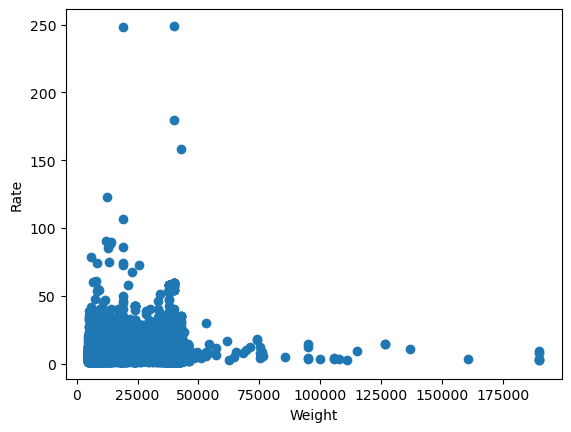

In [15]:
# Scatter plot for finding whether there is a correlation between weight (column with missing values) and rate(target) columns
plt.scatter(train_df['weight'], train_df['rate'])
plt.xlabel('Weight')
plt.ylabel('Rate')
plt.show()

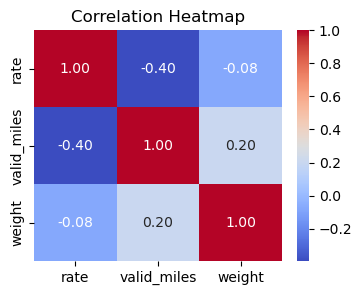

In [19]:
# finding correlations between numeric features
numeric_columns = train_df.select_dtypes(include=['number'])
correlations = numeric_columns.corr()
plt.figure(figsize=(4, 3))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# trying another correlation types
numeric_columns.corr(method='spearman')

,rate,valid_miles,weight
rate,1.000000,-0.698302,-0.118089
valid_miles,-0.698302,1.000000,0.220916
weight,-0.118089,0.220916,1.000000


In [21]:
numeric_columns.corr(method='kendall')

,rate,valid_miles,weight
rate,1.000000,-0.518590,-0.079011
valid_miles,-0.518590,1.000000,0.144134
weight,-0.079011,0.144134,1.000000


since missing data is small proportion and has a weak correlation with the target and other numerical features it means that it is missing completely at random (MCAR), and since there are outliers we can add median value to missing ones

In [34]:
# Apply imputation to train
train_df = impute_missing_values(train_df, 'median')

In [53]:
# Apply feature engineering - adding day of the week and month 
train_df['pickup_date'] = pd.to_datetime(train_df['pickup_date'])
validation_df['pickup_date'] = pd.to_datetime(validation_df['pickup_date'])
train_df = add_features(train_df)
validation_df = add_features(validation_df)

NameError: name 'add_features' is not defined

In [48]:
import feature_engineering
print(feature_engineering.__file__)

c:\Users\Nara\ml-engineer\feature_engineering.py
